In [1]:
import numpy as np
from Generators.BL import BL
from Samplers.IAF_ASDM import IAF_ASDM

In [2]:
dur = 5

dt = 0.05

f_max = 3
bw = 2 * np.pi * f_max

N_c = 3

min_diff = 1

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()

In [4]:
bias = 4.7
threshold = 0.55
k_constant = 0.15

In [5]:
c = np.max(np.abs(u))

perfect_recovery = (k_constant * threshold) <= ((bias - c) * np.pi) / (2 * bw)

print(f'Can this signal be perfectly recovered ? : {perfect_recovery}')

print(f'{(k_constant * threshold)}')
print(f'{((bias - c) * np.pi) / (2 * bw)}')

Can this signal be perfectly recovered ? : True
0.0825
0.15324985289981552


In [6]:
iaf_asdm = IAF_ASDM(bias, threshold, k_constant)

iaf_asdm.setSignal(t, u, dt, bw)

spikes = iaf_asdm.encode(initial_y = threshold)

u_rec = iaf_asdm.decode()

iaf_asdm.summary()

Integrate-and-Fire Sampler - ASDM
From "TIME ENCODING AND PERFECT RECOVERY OF BANDLIMITED SIGNALS"
Aurel A. Lazar, Laszlo T. Toth, 2004
Status: DECODED
Parameters:
Bias 'b': 4.7
Threshold 'delta': 0.55
Integretor constant 'k': 0.15


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


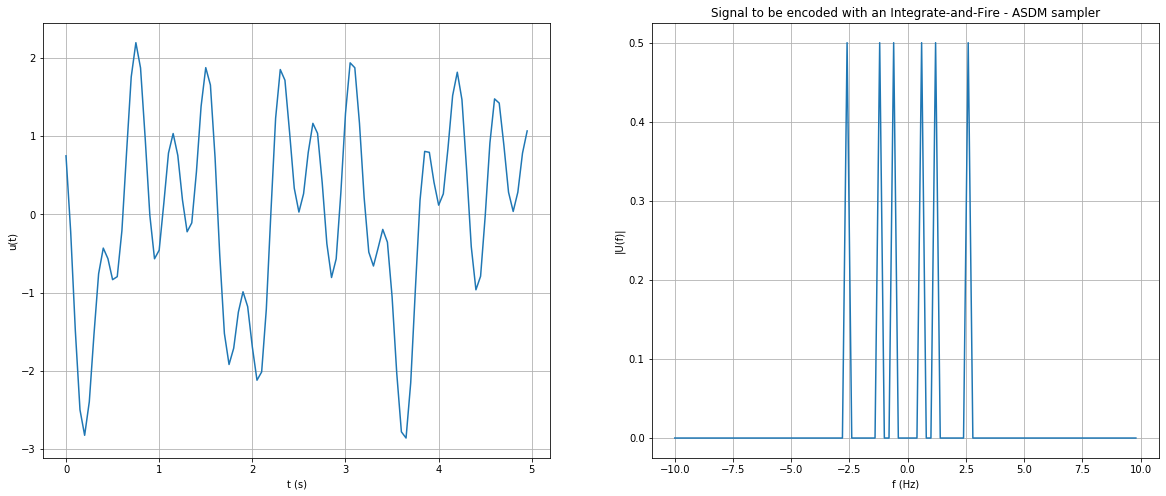

In [7]:
iaf_asdm.plotSignal()

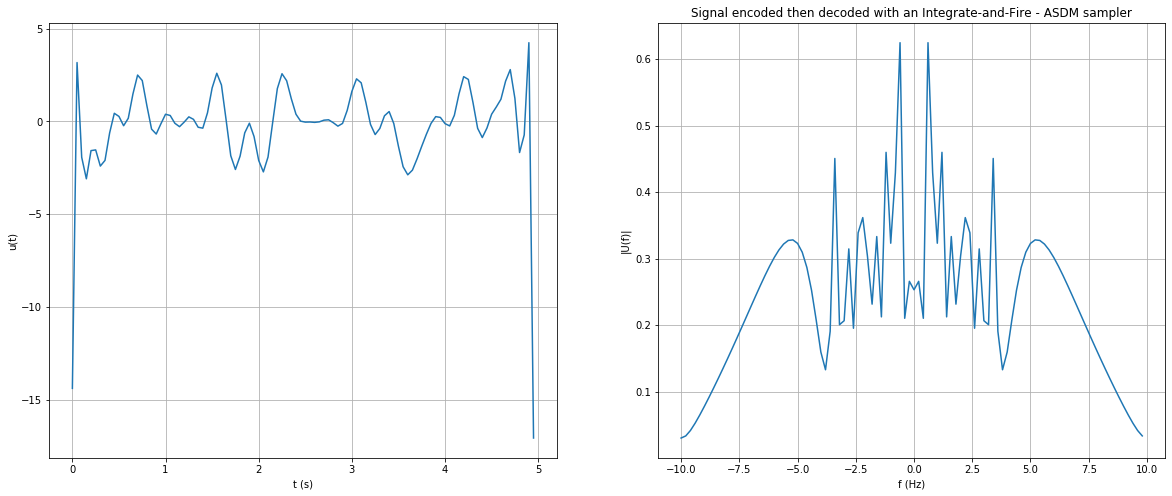

In [8]:
iaf_asdm.plotRecoveredSignal()

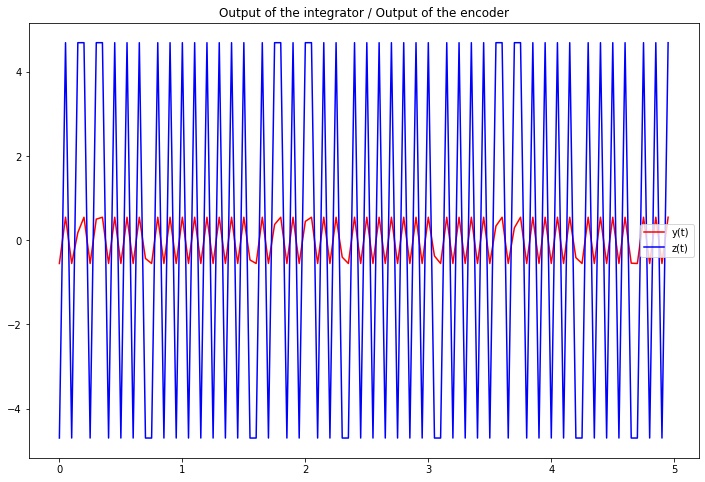

In [9]:
iaf_asdm.plotIntegralAndEncoderOutput()

/home/ghassenk/Bureau/EPFL/Master2/Semester Project - ICNS/plots.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, u)


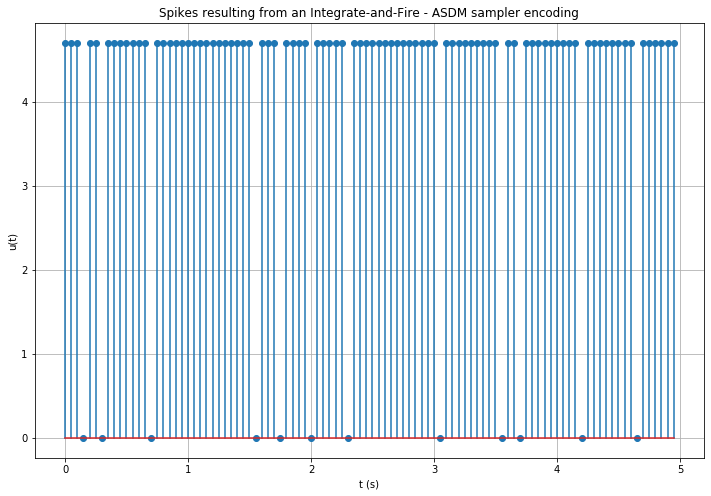

In [10]:
iaf_asdm.plotSpikes()

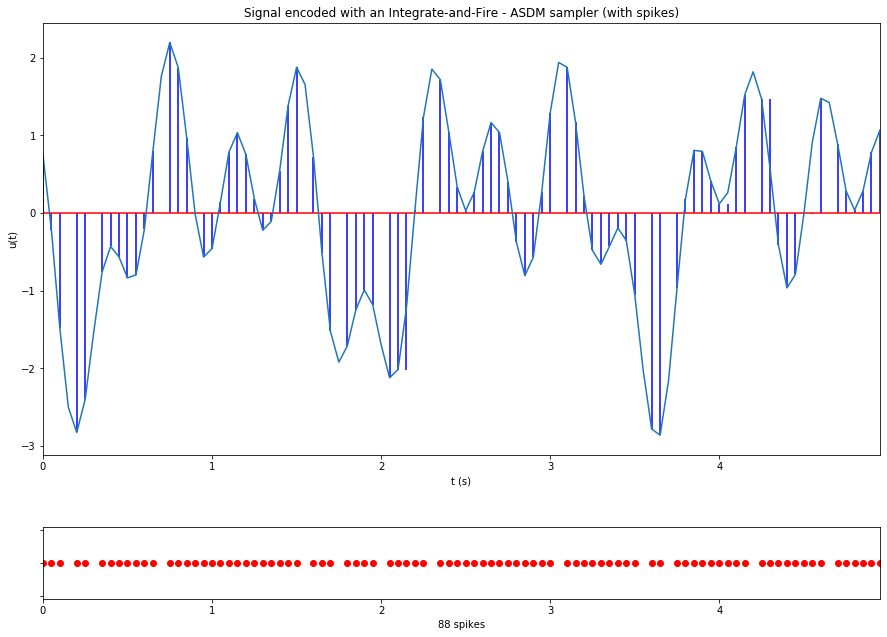

In [11]:
iaf_asdm.plotSignalAndSpikes()

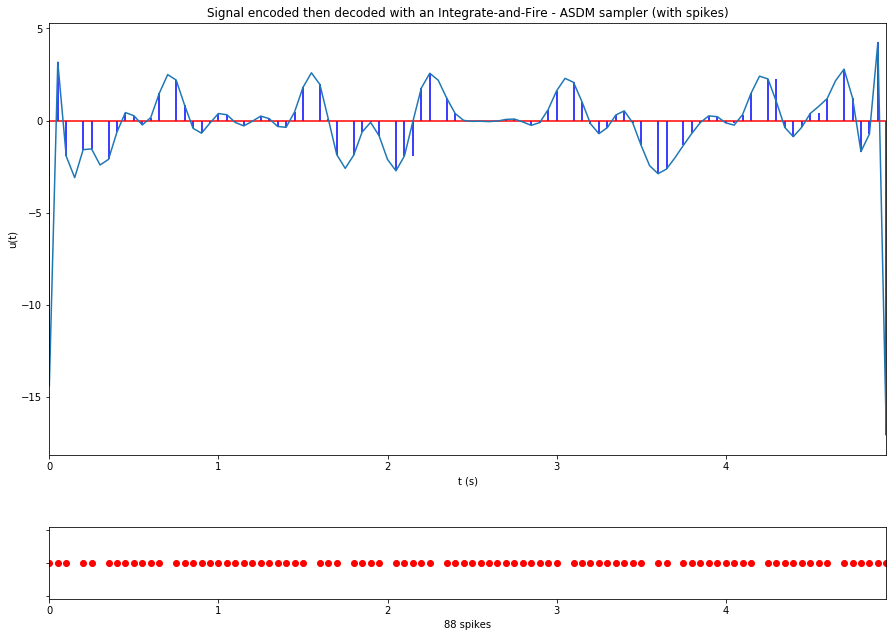

In [12]:
iaf_asdm.plotRecoveredSignalAndSpikes()

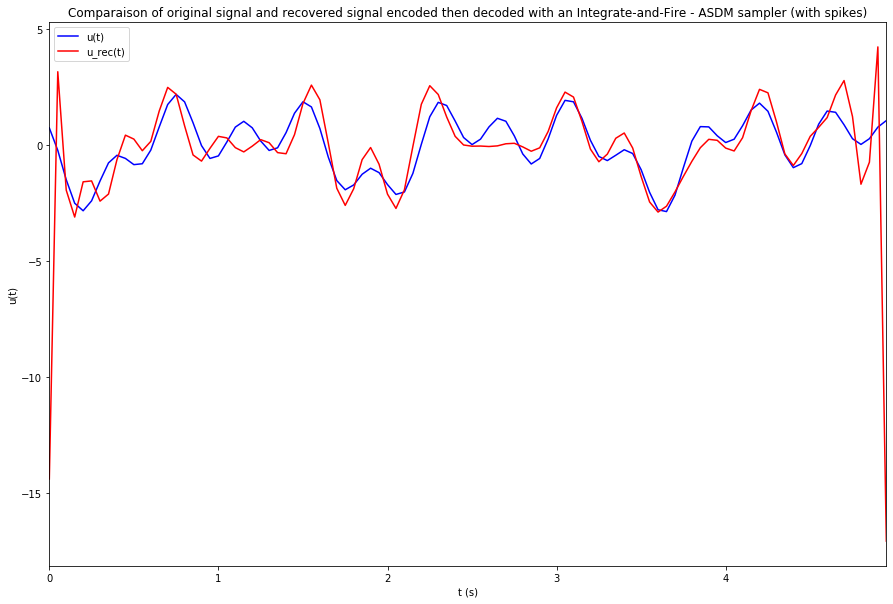

In [13]:
iaf_asdm.plotSignalAndRecoveredSignal()

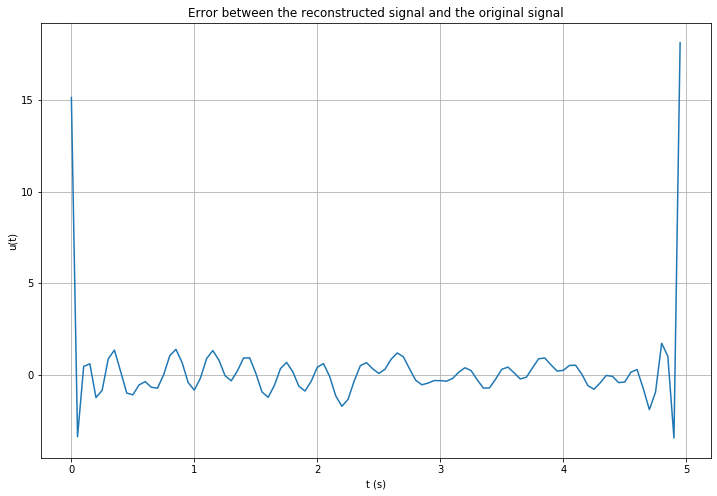

In [14]:
iaf_asdm.plotError()

In [15]:
print(f'The mean squared error of the signal is : {iaf_asdm.computeMeanSquaredError()}')

The mean squared error of the signal is : 632.1533756253789
